In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV



In [37]:
df = pd.read_csv("E:\\MACHINE LEARNING\\datasets\\Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.  handaling the null values 

In [38]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
from sklearn.impute import KNNImputer,SimpleImputer

In [40]:
# KNNImputer apply for age columns 
impute = KNNImputer()
imputed = impute.fit_transform(df[['Age']])
age_df = pd.DataFrame(imputed,columns=['age'])
age_df.head()


,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [41]:
 # SimpleImputer apply for embark columns 
sim_impute = SimpleImputer(strategy='most_frequent')
sim_imputed = sim_impute.fit_transform(df[['Embarked']])
embark_df = pd.DataFrame(sim_imputed,columns=['embarked'])
embark_df.head()

,embarked
0,S
1,C
2,S
3,S
4,S


In [42]:
df2 = df[['Sex','Fare','Pclass','Survived']]

In [43]:
x = pd.concat([embark_df,age_df,df2],ignore_index=True,axis=1)
x.columns=['embark','age','sex','fare','class','survived']


In [44]:
x.isnull().sum()

embark      0
age         0
sex         0
fare        0
class       0
survived    0
dtype: int64

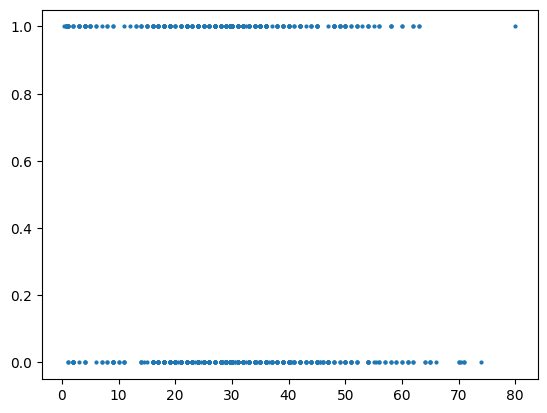

In [45]:
plt.scatter(x['age'],x['survived'],s=4)
plt.show()

In [46]:
x = x[x['age'] < 72] # removing the outliers rows 

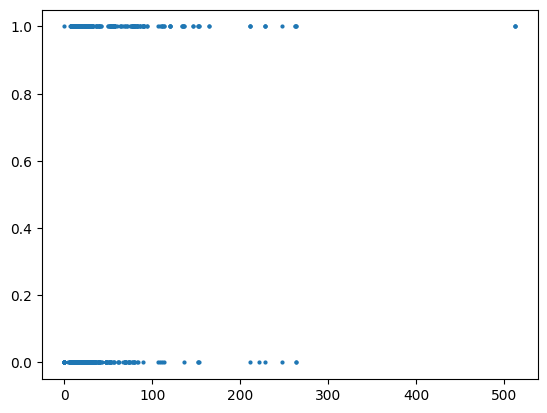

In [47]:
plt.scatter(x['fare'],x['survived'],s=4)
plt.show()

In [48]:
x  = x[x['fare']<300] # remove the outliers 

In [49]:
x['sex'].unique()

array(['male', 'female'], dtype=object)

In [50]:
x['sex'] = x['sex'].map({
    'male' : 1,
    'female' : 0
})
x.head()

,embark,age,sex,fare,class,survived
0,S,22.0,1,7.2500,3,0
1,C,38.0,0,71.2833,1,1
2,S,26.0,0,7.9250,3,1
3,S,35.0,0,53.1000,1,1
4,S,35.0,1,8.0500,3,0


In [51]:
y = x[['survived']]

In [52]:
x.drop('survived',axis=1,inplace=True)

In [53]:
# hot_encoding the class columns 
encode = OneHotEncoder(drop='first',sparse_output=False)
encoded = encode.fit_transform(x[['class','embark']])
class_df = pd.DataFrame(encoded,columns=encode.get_feature_names_out(['class','embark']))
class_df.reset_index(drop=True, inplace=True)
x = x.reset_index(drop=True)
features = pd.concat([x,class_df],axis= 1 )
features.drop('embark',axis=1,inplace=True) # after encding delteing the categorical columns 
features.head(10)


,age,sex,fare,class,class_2,class_3,embark_Q,embark_S
0,22.000000,1,7.2500,3,0.0,1.0,0.0,1.0
1,38.000000,0,71.2833,1,0.0,0.0,0.0,0.0
2,26.000000,0,7.9250,3,0.0,1.0,0.0,1.0
3,35.000000,0,53.1000,1,0.0,0.0,0.0,1.0
4,35.000000,1,8.0500,3,0.0,1.0,0.0,1.0
5,29.699118,1,8.4583,3,0.0,1.0,1.0,0.0
6,54.000000,1,51.8625,1,0.0,0.0,0.0,1.0
7,2.000000,1,21.0750,3,0.0,1.0,0.0,1.0
8,27.000000,0,11.1333,3,0.0,1.0,0.0,1.0
9,14.000000,0,30.0708,2,1.0,0.0,0.0,0.0


In [54]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [55]:
x_train,x_test,y_train,y_test = train_test_split(features,y,random_state= 40,test_size= 0.2)

# sgd classifier 

In [ ]:

from sklearn.linear_model import SGDClassifier
apply_1 = SGDClassifier()
model_1 = apply_1.fit(x_train,y_train)
y_pred_1 = model_1.predict(x_test)
print(accuracy_score(y_test,y_pred_1)*100)

78.65168539325843


C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# logistic regression without regularized perameters 

In [57]:


apply_2 = LogisticRegression()
model_2 = apply_2.fit(x_train,y_train)



C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
y_pred_2 = model_2.predict(x_test)
accuracy_score(y_pred_2,y_test)*100


84.26966292134831

# now with all regularized pameters 

In [ ]:
param_grid = {
    'penalty' : ['l1','l2','elasticnet',None],
    'C': [0.01,0.1,1,10],
    'solver': ['liblinear','saga'],
    'max_iter' : [100,200,300],
    'l1_ratio': [0.5,0.7]
}

model_3 =GridSearchCV(LogisticRegression(),param_grid,cv=5)
model_3.fit(x_train,y_train)

In [60]:
y_pred_3 =  model_3.predict(x_test)
print(accuracy_score(y_test,y_pred_3)*100)

84.26966292134831


# using bagging 

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model_3 = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=30,
    max_samples=0.25,
    bootstrap=True,
    n_jobs=-1)
model_3.fit(x_train, y_train)

C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=30, n_jobs=-1)

In [ ]:
y_pred = model_3.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.27%


# using random forest 

In [64]:

from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators=100,
                                  bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=5,
                                  max_features='sqrt')
model_4.fit(x_train, y_train)
y_pred = model_4.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.71%


C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


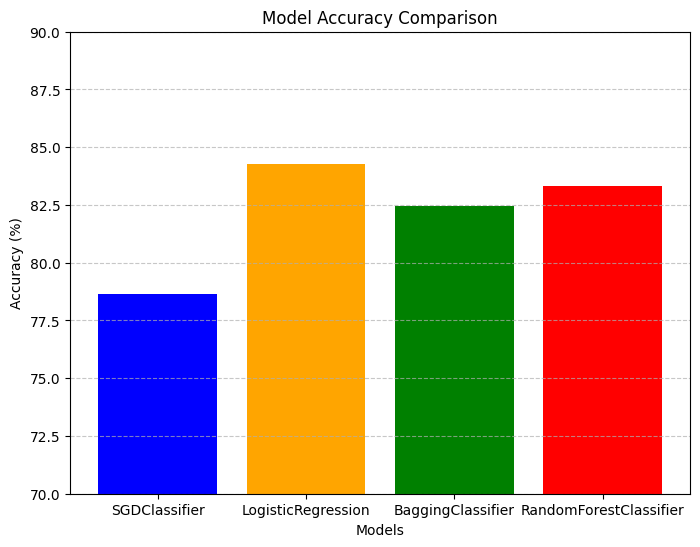

In [70]:
import matplotlib.pyplot as plt

models = ['SGDClassifier', 'LogisticRegression', 'BaggingClassifier', 'RandomForestClassifier']
accuracy_scores = [78.65, 84.27, 82.45, 83.30]
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(70, 90)  # Adjust y-axis range for better contrast
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
